# TSNE plots of pre-trained image and text embeddings

In [51]:
import numpy as np

In [52]:
def reduce_dimensions2(data, column_name):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # reduce using t-SNE
    rows = []
    for i, row in data.iterrows():
      rows.append(np.array(row[column_name]))

    vectors = np.array(rows)
    labels = np.array(data['label'])
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    
    return x_vals, y_vals, labels

In [53]:
from sklearn.manifold import TSNE 

In [54]:
cd

/root


In [55]:
import pandas as pd

In [56]:
data = pd.read_csv('final_df1.csv')

In [57]:
data.head()

,Unnamed: 0,index,Filenames,img_vec,sent_bert,label
0,0,0,12285257.jpg,[6.98720098e-01 2.60966659e+00 3.61103010e+00 ...,"[0.35146206620000003, -0.11924376340000001, 1....",1
1,1,1,20612245.jpg,[1.02503991e+00 2.31855202e+00 5.80042601e-01 ...,"[-0.28953588010000003, 0.8174290061, 0.8659862...",1
2,2,2,24194267.jpg,[8.11383903e-01 1.91382349e+00 6.40732288e-01 ...,"[0.9257186055000001, 0.7144697905, 0.412784069...",1
3,3,3,10179556.jpg,[4.19537115e+00 1.97929633e+00 2.78581649e-01 ...,"[-0.0909568593, -0.0777853057, 1.7487983704, 0...",1
4,4,4,10181785.jpg,[1.84880745e+00 3.97921872e+00 4.33759719e-01 ...,"[0.27096313240000003, 1.0884246826, 0.81006759...",1


In [58]:
data.columns

Index(['Unnamed: 0', 'index', 'Filenames', 'img_vec', 'sent_bert', 'label'], dtype='object')

In [59]:
def to_nums(x):
  return [float(i) for i in x]

In [60]:
data['img_vec'] = data['img_vec'].apply(lambda x: x.strip('[').strip(']'))
data['img_vec'] = data['img_vec'].apply(lambda x: x.split())
data['img_vec'] = data['img_vec'].apply(lambda x: to_nums(x))

In [61]:
data['sent_bert'] = data['sent_bert'].apply(lambda x: x.strip('[').strip(']'))
data['sent_bert'] = data['sent_bert'].apply(lambda x: x.split(','))
data['sent_bert'] = data['sent_bert'].apply(lambda x: to_nums(x))

In [62]:
data['sent_bert'][0]

[0.35146206620000003,
 -0.11924376340000001,
 1.844935298,
 0.18647113440000002,
 0.224926278,
 -0.5676003695,
 0.7170128226,
 0.1763528436,
 0.1716876924,
 -0.1620520651,
 -0.3919081688,
 -0.0032825458000000003,
 0.9721592069,
 0.4507831633,
 -0.3423107266,
 0.1914443821,
 0.5030955672,
 -0.1769228876,
 -0.021175285800000002,
 -1.194437027,
 0.1612754315,
 -0.031195512,
 -0.6845555305000001,
 0.0133694159,
 -0.1711475849,
 -0.9001001716,
 -0.1929607093,
 -0.0647294298,
 -0.8176270723,
 0.3229118288,
 -0.3167402446,
 1.021359086,
 -0.3157337308,
 -0.6935922503,
 0.7368544936,
 -0.2822615504,
 -0.6653233171,
 -0.5001912713000001,
 -0.49628299470000004,
 0.0753325671,
 -0.4429704547,
 -0.6188853383,
 1.0350874662,
 -0.0102304807,
 -0.979005754,
 0.0214266945,
 1.5729310512999999,
 0.7853501439,
 1.1612930298,
 -1.0588377714,
 0.7940615416,
 0.0473805927,
 0.8523950577,
 -0.2370500714,
 0.38188567760000003,
 0.3380776346,
 0.033444091700000005,
 -0.6617045403,
 -0.2093970776,
 0.198635429

In [63]:
import matplotlib.pyplot as plt

In [64]:
import seaborn as sns

In [65]:
def plot_with_matplotlib3(data, column_name):
    
    x_vals, y_vals, labels = reduce_dimensions2(data, column_name)
    meme_labels = []
    for x in labels:
      if x == 0:
        meme_labels.append('Non_meme')
      else:
        meme_labels.append('Meme')
    
    df = pd.DataFrame({'Reduced Dimension 1': x_vals, 
                       'Reduced Dimension 2': y_vals, 
                       'label': meme_labels})


    sns.scatterplot(data=df, x="Reduced Dimension 1", 
                    y="Reduced Dimension 2", 
                    hue='label',
                    alpha=0.8, 
                    palette="Set2")
    plt.title("T-SNE visualization of embeddings", fontsize=16)
    plt.xlabel("Reduced Dimension 1", fontsize=16)
    plt.ylabel("Reduced Dimension 2", fontsize=16)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


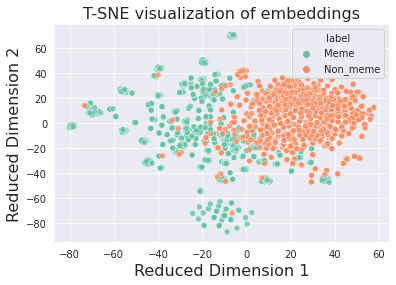

In [66]:
plot_with_matplotlib3(data, 'img_vec')

In [67]:
x_vals, y_vals, labels = reduce_dimensions2(data, 'img_vec')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [68]:
labels = np.array(data['label'])

In [69]:
labels

array([1, 1, 1, ..., 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


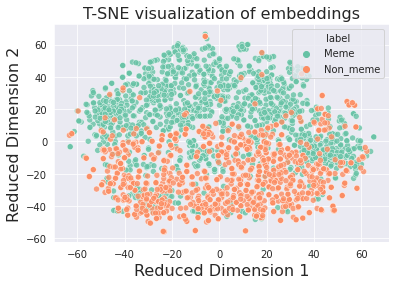

In [70]:
plot_with_matplotlib3(data, 'sent_bert')

# Apporach two to multi-modular model

In [71]:
data.head()

,Unnamed: 0,index,Filenames,img_vec,sent_bert,label
0,0,0,12285257.jpg,"[0.698720098, 2.60966659, 3.6110301, 0.1709920...","[0.35146206620000003, -0.11924376340000001, 1....",1
1,1,1,20612245.jpg,"[1.02503991, 2.31855202, 0.580042601, 0.485834...","[-0.28953588010000003, 0.8174290061, 0.8659862...",1
2,2,2,24194267.jpg,"[0.811383903, 1.91382349, 0.640732288, 0.59275...","[0.9257186055000001, 0.7144697905, 0.412784069...",1
3,3,3,10179556.jpg,"[4.19537115, 1.97929633, 0.278581649, 1.841633...","[-0.0909568593, -0.0777853057, 1.7487983704, 0...",1
4,4,4,10181785.jpg,"[1.84880745, 3.97921872, 0.433759719, 1.908248...","[0.27096313240000003, 1.0884246826, 0.81006759...",1


In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
rows1 = []
for i, row in data.iterrows():
  rows1.append(np.array(row['img_vec']))

rows2 = []
for i, row in data.iterrows():
  rows2.append(np.array(row['sent_bert']))

In [75]:
a1 = np.array(rows1)

In [76]:
a2 = np.array(rows2)

In [77]:
a2.shape

(2206, 768)

In [78]:
a1

array([[0.6987201 , 2.60966659, 3.6110301 , ..., 0.20537573, 0.22976148,
        1.47893894],
       [1.02503991, 2.31855202, 0.5800426 , ..., 0.39006352, 0.70093375,
        4.37850189],
       [0.8113839 , 1.91382349, 0.64073229, ..., 0.7281875 , 0.47526014,
        0.93196917],
       ...,
       [0.28561765, 0.66300541, 0.03229722, ..., 1.01685524, 0.14251895,
        1.12864137],
       [0.23822518, 0.16806112, 1.35491371, ..., 0.6249668 , 0.32301596,
        1.64099944],
       [0.37890419, 0.82882112, 0.32829434, ..., 0.79625624, 0.74694723,
        0.85076547]])

In [79]:
a1.shape

(2206, 512)

In [80]:
X = []
for i, row in enumerate(a1):
  X.append(np.concatenate((row, a2[i]), axis=None))

In [81]:
np.array(X).shape

(2206, 1280)

In [82]:
y = data['label']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [84]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [85]:
clf.score(X_test, y_test)

0.9927536231884058

In [86]:
out = clf.predict(X_test)

In [87]:
clf.loss_curve_

[0.45747175797292366,
 0.1279445118702157,
 0.06729007767191454,
 0.04048154868451284,
 0.02892800978897954,
 0.01886885286428159,
 0.01597645253953471,
 0.012013248707551504,
 0.00998508356296862,
 0.00782782637726595,
 0.0064368771376354245,
 0.0055480253674893044,
 0.004701248422168835,
 0.004122705027092916,
 0.003684050870075892,
 0.0032885970564575195,
 0.002934808017524526,
 0.0026469368147010986,
 0.002434199872995148,
 0.0022650952815466913,
 0.0020045105176386105,
 0.001866481566924114,
 0.001759055641408118,
 0.0015815416849033832,
 0.0014620975229958236,
 0.0013882115971146163,
 0.001279282336462041,
 0.0011865006776880847,
 0.001137421069105321,
 0.0010470930797949153,
 0.0009772007207081619,
 0.0009216173918042526,
 0.000877299925891316,
 0.0008279731186592936,
 0.0007799952662545595,
 0.0007367818928513848,
 0.0007057106760779868,
 0.0006649964930356503]

In [88]:
len(clf.loss_curve_)

38

In [89]:
clf.n_iter_

38

In [90]:
loss_df = pd.DataFrame({'training_epoch': range(clf.n_iter_), 
                     'loss': clf.loss_curve_})

In [91]:
sns.set_style("darkgrid")

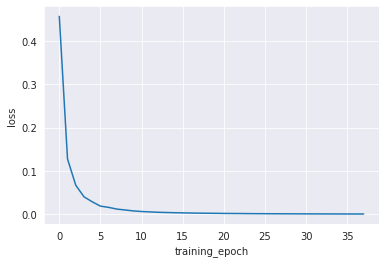

In [92]:
sns.lineplot(data=loss_df, x='training_epoch', y='loss');